# Amphi 6 - Regression [1] - Linear Regression, Polynomial Regression, Ridge and Lasso

# 1. Linear Regression

In regression problem, we would like to predict values of a variable $y$ as a function of some variable $\mathbf X \in \mathbf R^D$. 

Let $\mathbf X_1, \ldots, \mathbf X_N$ and $y_1, \ldots, y_N$ be some observations of $\mathbf X$ and $y$, respectively. We want to define a function $g(\mathbf X)$ to describe the relation between $y$ and $g(\mathbf X)$, hopefully $y \approx g(\mathbf X)$. 

## 1.1 The loss function

We define a **loss function** $L(g, \mathbf X, y)$ which has small value when $f(\mathbf X) \approx y$ and greater value when $f(\mathbf X)$ is far from $y$.  

In regression, one of the most common choices is the **square loss**. It is convenient for differentiation calculus.

**Quadratic loss (with respect to the estimation of $y$ by $g(\mathbf X)$**
$$ L(g, \mathbf X, y) = \vert y - g(\mathbf X) \vert^2 $$

Suppose that $g(\mathbf X)$ is a good prediction of $y$, then $g(\mathbf X_i) \approx y_i$ for $N$ observations $(\mathbf X_i, y_i), i = 1, \ldots, N$. In practice, we can define the loss with respect to the estimation of $y_1, \ldots, y_N$ by $g(\mathbf X_1), \ldots, g(\mathbf X_N)$ as the sum of square loss on each observation.

**Quadratic loss (for $ N $ observations)**
$$ L(g, \mathbf X_1, \ldots, \mathbf X_N, y_1, \ldots, y_N) = \sum_{n=1}^N \vert y_n - g(\mathbf X_n) \vert^2 $$

This loss is also called the squared error/squared loss function.
Its mean $$\frac1N L(g, \mathbf X_1, \ldots, \mathbf X_N, y_1, \ldots, y_N) $$ is called the **mean-squared error**.
Its square root $$\sqrt {\frac1N L(g, \mathbf X_1, \ldots, \mathbf X_N, y_1, \ldots, y_N) }$$ is called the **root-mean-squared error** (RMSE).

## 1.2 Linear model

In regression, the model is called linear if $g(\mathbf X)$ is of the form:
$$
g(\mathbf X) = \mathbf X \cdot \mathbf w + b
$$
where $\mathbf w \in \mathbf R^D$, $\mathbf b \in \mathbf R$.

By adding a new coordinate to variable $\mathbf X$ if necessary, we can suppose that the last coordinate of $\mathbf X$ is always 1. Then the linear model have the form:
$$
g(\mathbf X) = \mathbf X \cdot \mathbf w
$$
Here $b$ in the first representation become the last coordinate of $\mathbf w$.

Hence, without loss of generality, we will use $g(\mathbf X) = \mathbf X \cdot \mathbf w$ as the general form of linear models.

## 1.3 Minimizing the loss function

If we choose the square loss as our loss function (a criterion to evaluate which model is better), linear model as our model, and the observation $(\mathbf X_n, y_n)_{n = 1, \ldots, N}$ as training data, then the evident strategy is to find $\mathbf w$ that minimizes the loss function over the training data. The problems becomes:

$$
\min\limits_{\mathbf w \in \mathbf R^D} \sum_{n=1}^N \vert y_n - \mathbf X_n \cdot \mathbf w \vert^2
$$

Let $\mathbf y = (y_1, \ldots, y_N)^t$ denote the vector in $\mathbf R^N$ whose coordinates are the $N$ observations of $y$, and $\mathbf \Phi$ denote the matrix in $\mathbf R^{N \times D}$ whose rows are $\mathbf X_n^t$, the $N$ observations of $X$.

Then $\sum_{n=1}^N \vert y_n - \mathbf X_n \cdot \mathbf w \vert^2$ becomes $\Vert \mathbf y - \mathbf \Phi \mathbf w \Vert^2$. The problem becomes:

$$
\min\limits_{\mathbf w \in \mathbf R^D} \Vert \mathbf y - \mathbf \Phi \mathbf w \Vert^2
$$

Let $\mathcal L(\mathbf w) = \Vert \mathbf y - \mathbf \Phi \cdot \mathbf w \Vert^2$. This is a function $\mathbf R^D \to \mathbf R$, convex in $\mathbf w$, hence a local minimum (if exists) will be unique and minimize the function.

The minimum can be found by solving:
$$
\nabla_{\mathbf w} \mathcal L = \mathbf 0 \Leftrightarrow 2\mathbf \Phi^t(\mathbf \Phi \mathbf w - \mathbf y) = 0
$$
$$
\Leftrightarrow \mathbf \Phi^t \mathbf \Phi \mathbf w = \mathbf \Phi^t \mathbf y
$$

In case $\mathbf \Phi^t \mathbf \Phi$ invertible, the solution is
$$
\hat{\mathbf w} = (\mathbf \Phi^t \mathbf \Phi)^{-1} \mathbf \Phi^t \mathbf y
$$

If $\Phi^t\Phi$ is not invertible, the inverse can be replace by the (Moore-Penrose) pseudo inverse matrix or any generalized pseudo inverse.
$$
\hat{ \mathbf w} = (\mathbf \Phi^t \mathbf \Phi)^{+} \mathbf \Phi^t \mathbf y
$$

## 1.4 The Moore-Penrose pseudo inverse matrix in Python

Use **numpy.linalg.pinv** to find the pseudo inverse.

In [1]:
import numpy as np
X = np.array([[1, 1, 1], [1, 2, 3]])
y = np.array([2, 3])
print X.transpose().dot(X) 

[[ 2  3  4]
 [ 3  5  7]
 [ 4  7 10]]


In [2]:
#np.linalg.inv(X.transpose().dot(X) )

In [3]:
print np.linalg.pinv(X.transpose().dot(X))

[[ 2.02777778  0.44444444 -1.13888889]
 [ 0.44444444  0.11111111 -0.22222222]
 [-1.13888889 -0.22222222  0.69444444]]


In [4]:
w = np.linalg.pinv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print w

[1.16666667 0.66666667 0.16666667]


In [5]:
print (X.transpose().dot(X)).dot(w) #Phi^t Phi w

[ 5.  8. 11.]


In [6]:
print (X.transpose().dot(y)) #Phi^t y

[ 5  8 11]


## 1.5 Complexity

The solution in closed form can be found in $O(ND^2)$ (case $D << N$) or $O(D^3)$ (case $N << D$).

# 2 Probabilistic Model for Linear Regression

## 2.1 Hypothesis

Suppose that the random variable $\mathbf X \in \mathbf R^D$ and the random variable $y$ satisfying:

- The distribution of $\mathbf X$ is arbitrary.
- 
$$
y|\mathbf X \sim \mathcal N \left(\mathbf X \cdot \mathbf w, \sigma^2 \right) 
$$

for some unknown vector $\mathbf w$. Equivalently,

$$
p(y | \mathbf X) = \frac1{\sqrt{2\pi}\sigma} \exp\left( -\frac{|y - \mathbf X \cdot \mathbf w|^2}{2\sigma^2}\right)
$$

Or equivalently,
$$
y = \mathbf X \cdot \mathbf w + \epsilon
$$
where $\epsilon$ is some white noise ($\epsilon \sim \mathcal N(0, \sigma)$), independent of $\mathbf X$ and independent across observations.

## 2.2 Likelihood function

Consequence of assumption: $y$ is independent across observations, conditional on $\mathbf X$, i.e., if $(\mathbf X_i, y_i)$, $(\mathbf X_j, y_j)$ are observations of $(\mathbf X, y)$, then

$$
p(y_i, y_j | \mathbf X_i, \mathbf X_j) = p(y_i| \mathbf X_i)p(y_j | \mathbf X_j)
$$

Given $N$ observations of $\mathbf X, y$ as observations of $N$ iid variables following the same rule as $(\mathbf X, y)$. Then:
$$
p(y_1, \ldots, y_N | \mathbf X_1, \ldots, \mathbf X_N) = p(y_1| \mathbf X_1) \ldots p(y_N | \mathbf X_N) 
$$

This is a function of $\mathbf w, \sigma$; is called the likelihood function of observing the data:

$$
p(y_1, \ldots, y_N | \mathbf X_1, \ldots, \mathbf X_N; \mathbf w, \sigma) = \prod_{n=1}^N \frac{1}{\sqrt{2\pi}\sigma} \exp \left(-\frac{|y_n - \mathbf X_n \cdot \mathbf w|^2}{2\sigma^2} \right) = (2\pi)^{-N/2} \sigma^{-N} \exp\left( - \sum_{n=1}^N \frac{|y_n - \mathbf X_n \cdot \mathbf w|^2}{2\sigma^2} \right)
$$

The probabilistic model of linear regression aims to maximize this function with respect to $\mathbf w, \sigma$. Equivalently, we minimize the negative **log-likelihood**:

$$
L(\mathbf w, \sigma) = \frac N{2} \log 2\pi + N \log \sigma + \frac 1 {2\sigma^2} \sum_{n=1}^N |y_n - \mathbf X_n \cdot \mathbf w|^2
$$

## 2.3 The estimators

The solution of the minimization problem can be found by deriving the function $L$ wrt $\mathbf w$, $\mathbf \sigma$. This is a convex function in $\mathbf w$.
$$
\hat{\mathbf w} = (\mathbf \Phi^t \mathbf \Phi)^{-1} \mathbf \Phi^t \mathbf y
$$

$$
\hat \sigma^2 = \frac1N \sum_{n=1}^N \left( y_n - \mathbf X_n \cdot \hat{\mathbf w} \right)^2 = \frac1N \Vert \mathbf y - \mathbf \Phi \hat{\mathbf w} \Vert^2
$$

The estimator $\hat {\mathbf w}$ is unbiased: $\mathbf E[\hat{\mathbf w}] = \mathbf w$.

The estimator $\hat {\sigma}$ is biased: $\mathbf E [\hat {\sigma}^2] = \frac{N-D}{N} \sigma^2$. When $\mathbf E [\hat {\sigma}^2] < \sigma^2$, we say that the $\sigma$ is underestimated. We can use $\frac{N}{N-D}\hat{\sigma}$ as an unbiased estimator for $\sigma$.

# 3. Implementation of Linear Regression in scikit-learn

In scikit learn, linear regression model is implemented by **`LinearRegression`** class.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**Parameters:**
- `fit_intercept`: `True` when the intercept (coefficient of degree 0 is 0)
- `normalize`: `True` if we want to normalize the columns

**Attributes:**
- `coef_`
- `intercept_`

**Methods:**
- `fit`
- `predict`
- `score`: The R2-score (Coefficient of determination) evaluated on test set.

**Remind**:
R2-score: https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination

### Example:

We simulate a case $y = \mathbf X \cdot \mathbf w + b + \epsilon$ where $\epsilon$ is a white noise (some Gaussian distribution of mean 0 and variance $\sigma^2 = 0.01$).

In [7]:
import numpy as np
np.random.seed(0)
from sklearn.linear_model import LinearRegression

TEST_SIZE = 0.2
TRAIN_TEST_SPLIT_RANDOM_STATE = 0

w = np.array([1.5, -2.1, 4, 0, -1.3])
b = 2
sigma = 0.1

D = 5
N = 10000

X = np.random.uniform(-5, 5, [N, D])
epsilon = np.random.normal(0, sigma, N)
y = X.dot(w) + b + epsilon

lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We retrieved the coefficients

In [8]:
lr_model.coef_, lr_model.intercept_

(array([ 1.49938033e+00, -2.09964527e+00,  4.00031001e+00,  7.13504117e-04,
        -1.30053577e+00]), 1.999665613542589)

The approximation

In [9]:
y_pred = lr_model.predict(X)
import pandas as pd
pd.DataFrame([y, y_pred])

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,3.277741,22.668349,13.986498,14.465190,6.347043,30.614259,-2.897176,3.712321,6.841166,-2.561723,...,15.815272,9.788053,13.152335,17.614369,-4.396698,-6.814206,18.662390,-1.90517,-1.540044,-12.746520
1,3.317423,22.688948,14.070902,14.378545,6.320241,30.484073,-2.783799,3.726107,6.949122,-2.433810,...,15.687191,10.004899,13.247911,17.633092,-4.367921,-6.652553,18.685393,-1.88928,-1.591966,-12.683399


**R2-score**

In [10]:
lr_model.score(X, y)

0.999951318606377

**RMSE**

In [11]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

0.09976205156094636

# 4. Train/Test Split and Cross-validation

## 4.1 Train/Test Split

In general, we separate the data set into separated parts for training and validation (test) purpose. Method **`train_test_split`** in module **`preprocessing`** allows us to get a random split corresponding to some test size proportion.

A widely used proportion for training/test split is 80:20. If data is sufficiently collected, larger test set can be used, for example 50% of the whole data set.

**Implementation in Python**
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
import numpy as np
np.random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

w = np.array([1.5, -2.1, 4, 0, -1.3])
b = 2
sigma = 0.1

N = 10000

X = np.random.uniform(-5, 5, [N, D])
epsilon = np.random.normal(0, sigma, N)
y = X.dot(w) + b + epsilon


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=TRAIN_TEST_SPLIT_RANDOM_STATE)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_predict_train = lr_model.predict(X_train)
sigma_hat = mean_squared_error(y_train, y_predict_train)

print "RMSE on training set:", sigma_hat

y_predict =  lr_model.predict(X_test)
RMSE = mean_squared_error(y_test, y_predict)

print "RMSE on test set:", RMSE

RMSE on training set: 0.00993896058188198
RMSE on test set: 0.010016366346361138


## 4.2 Cross-validation

**Cross-validation** is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set.

**K-folds** is a technique of cross-validation that divide a data set into $k$ parts of approximatively equal size, then respectively use $K-1$ parts for training and 1 part for validation. It reduces impacts of particular validation sets on the model evaluation. Hence, cross-validation is usually used for model comparison. 

**Implementation in Python**
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [13]:
import numpy as np
np.random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

w = np.array([1.5, -2.1, 4, 0, -1.3])
b = 2
sigma = 0.1

N = 10000

X = np.random.uniform(-5, 5, [N, D])
epsilon = np.random.normal(0, sigma, N)
y = X.dot(w) + b + epsilon

lr_model = LinearRegression()
scores = cross_val_score(lr_model, X, y, cv=5)

print scores

[0.99995296 0.99995201 0.99995048 0.99994935 0.99995108]


We need to specify the score being used:

In [14]:
lr_model = LinearRegression()
scores = cross_val_score(lr_model, X, y, scoring=lambda lr_model, X, y: mean_squared_error(y, lr_model.predict(X)), cv=5)

print scores

[0.00971637 0.00975181 0.01035292 0.0099325  0.01011505]


# 5. Polynomial Regression

In polynomial regression, we try predicting $y$ using a polynomial of features of $\mathbf X$ using quadratic loss. Polynomial regression hence can be considered as linear regression on transformed features of $\mathbf X$. For example, polynomial regression on $\mathbf X$ using quadratic polynomial:

$$
y \approx g(\mathbf X) = a_{00} + a_{01}X_{1} + \ldots + a_{0D} X_{D} + \sum_{i=1}^D a_{ii}X_{i}^2 + \sum_{1\leq i<j\leq D} a_{ij}X_{i}X_{j}
$$

is like linear regression on 1 (the dummy variable), $X_i$, $X_i^2$, $X_i X_j$.

In Python, we can use **PolynomialFeatures** to transform $\mathbf X$ to higher order features, then use linear regression.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

array([-0.38473405,  0.69642765,  0.42861499])

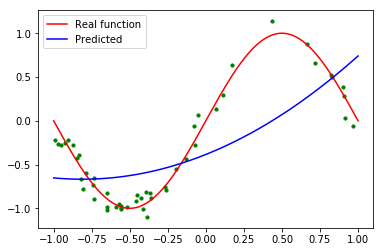

In [15]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

sigma = 0.1
N = 50

X = np.random.uniform(-1, 1, [N, 1])

epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon
plt.scatter(X[:,0], y, s=10, color='green')

interval = np.linspace(-1, 1, 100)
plt.plot(interval, np.sin(np.pi * interval), 'r', label = "Real function")

DEGREE = 2
poly = PolynomialFeatures(degree = DEGREE)
new_X = poly.fit_transform(X)


lr_model = LinearRegression(fit_intercept = False)
lr_model.fit(new_X, y)
plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'b', label="Predicted")
    
plt.legend()
lr_model.coef_


# 6. The Bias-Variance Trade-off

## 6.1 Notions

Suppose that $y=f(x)+\epsilon$ where $\epsilon$ is some white noise ($\epsilon \sim \mathcal N (0, \sigma^2)$). 

Let a training set be generated automatically and $\hat f$ is an estimator (depending on the traing set and the noise). $\hat f$ is therefore a random varible. For any $x$, let $\mathbf E_n$ and $\mathbf E_d$ denote the esperance wrt noise distribution and training data generation distribution.

$$
\mathbf E[(y - \hat f(x))]^2 = \mathbf E_d\left[ \left(\hat f(x) - \mathbf E_d [\hat f(x)] \right) \right]^2 + \left( \mathbf E_d [\hat f(x)] - f(x) \right)^2 + \mathbf E_n (y - f(x))^2
$$

- The third term = $\sigma^2$ is the intrinsic noise of the reality, independent of the model. 

- The second term is called square of **bias** of $\hat f$ in comparison with $f$, it is the difference of the real function $f$ with the expected estimator $\mathbf E_d [\hat f(x)]$, i.e, the best $\hat f(x)$ in case sufficient large data set are provided. It depends on choice of model. For example, when approximating a non-linear function using a linear model, in the best case there will still be error in the estimates due to this assumption.

- The first term is called **variance** of $\hat f$. It depends on choice of model. It measures how much the learning method {\displaystyle {\hat {f}}(x)} \hat{f}(x) will move around its mean.

We have:

<center><strong>
```
Error = Variance + Bias^2 + Noise
```
</strong></center>

A model that has high bias and low variance is called **underfitting**. It is usually too simple to describe the observations. In case of linear regression, underfitting model gives high RMSE on both training set and test set.

A model that has low bias and high variance is called **overfitting**. It is usually sufficiently complex to perfectly fit the training model, but performs very poor on test set.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson6/Amphi/Untitled1.png">

## 6.2 Example

We want to fit the function $\sin(\pi x)$ on \[-1, 1\] by using polynomials. Suppose we are provided 50 data points. We wish to use 80% for training and 20% for test.

Fitting by a polynomial of degree 1
Train error: 0.191144; Test error: 0.314094.
Fitting by a polynomial of degree 2
Train error: 0.184276; Test error: 0.428078.
Fitting by a polynomial of degree 3
Train error: 0.011794; Test error: 0.023247.
Fitting by a polynomial of degree 4
Train error: 0.011793; Test error: 0.023387.
Fitting by a polynomial of degree 5
Train error: 0.006400; Test error: 0.008969.
Fitting by a polynomial of degree 6
Train error: 0.006399; Test error: 0.009029.
Fitting by a polynomial of degree 7
Train error: 0.006256; Test error: 0.009990.
Fitting by a polynomial of degree 8
Train error: 0.006235; Test error: 0.010381.
Fitting by a polynomial of degree 9
Train error: 0.005776; Test error: 0.017285.
Fitting by a polynomial of degree 10
Train error: 0.005709; Test error: 0.017785.
Fitting by a polynomial of degree 11
Train error: 0.005680; Test error: 0.015197.
Fitting by a polynomial of degree 12
Train error: 0.004949; Test error: 0.032118.
Fitting by a polynomial o

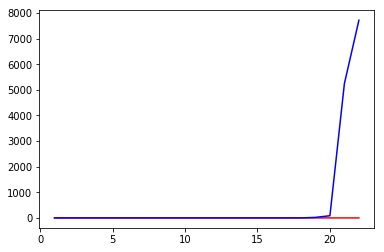

In [16]:
sigma = 0.1

N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon

DEGREES = range(1, 23)
train_errs = []
test_errs = []

for degree in DEGREES:
    print("Fitting by a polynomial of degree %d" % degree)
    poly = PolynomialFeatures(degree = degree)
    new_X = poly.fit_transform(X)
    lr_model = LinearRegression(fit_intercept = False)
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=TRAIN_TEST_SPLIT_RANDOM_STATE)
    lr_model.fit(X_train, y_train)
    train_error = mean_squared_error(y_train, lr_model.predict(X_train))
    test_error = mean_squared_error(y_test, lr_model.predict(X_test))
    print("Train error: %f; Test error: %f." % (train_error, test_error))
    train_errs.append(train_error)
    test_errs.append(test_error)

plt.plot(DEGREES, train_errs, 'r', label="Error on training set")
plt.plot(DEGREES, test_errs, 'b', label="Error on test set")   

It seems that the model **underfits** for degree = 1, 2; **overfits** for degree >= 15.

However, this results depends on our training/test split. Some particular test set can affect the score and make it small. We perform again a trial with cross-validation's help.

Fitting by a polynomial of degree 1
Mean of scores: 0.258306; Stddev of scores: 0.135451
Fitting by a polynomial of degree 2
Mean of scores: 0.264669; Stddev of scores: 0.159139
Fitting by a polynomial of degree 3
Mean of scores: 0.012944; Stddev of scores: 0.008452
Fitting by a polynomial of degree 4
Mean of scores: 0.013754; Stddev of scores: 0.009301
Fitting by a polynomial of degree 5
Mean of scores: 0.013116; Stddev of scores: 0.008189
Fitting by a polynomial of degree 6
Mean of scores: 0.013944; Stddev of scores: 0.009536
Fitting by a polynomial of degree 7
Mean of scores: 0.014950; Stddev of scores: 0.010291
Fitting by a polynomial of degree 8
Mean of scores: 0.017798; Stddev of scores: 0.016773
Fitting by a polynomial of degree 9
Mean of scores: 0.020299; Stddev of scores: 0.024606
Fitting by a polynomial of degree 10
Mean of scores: 0.016791; Stddev of scores: 0.013448
Fitting by a polynomial of degree 11
Mean of scores: 0.015143; Stddev of scores: 0.010758
Fitting by a polyno

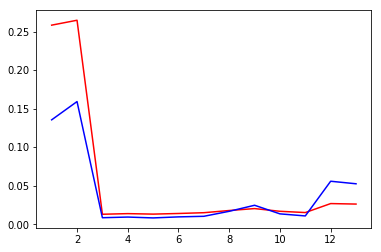

In [17]:
sigma = 0.1

N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon

DEGREES = range(1, 14)
mean_scores = []
std_scores = []

for degree in DEGREES:
    print("Fitting by a polynomial of degree %d" % degree)
    poly = PolynomialFeatures(degree = degree)
    new_X = poly.fit_transform(X)
    lr_model = LinearRegression(fit_intercept = False)
    scores = cross_val_score(lr_model, new_X, y, scoring=lambda lr_model, X, y: mean_squared_error(y, lr_model.predict(X)), cv=20)
    print("Mean of scores: %f; Stddev of scores: %f" % (np.mean(scores), np.std(scores)))
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.plot(DEGREES, mean_scores, 'r', label="Mean of scores") 
plt.plot(DEGREES, std_scores, 'b', label="Std dev of scores") 

This, again, suggests us choose polynomial of degree 3, 4, 5 for best fitting.

**Degree 2 - An underfitting model**

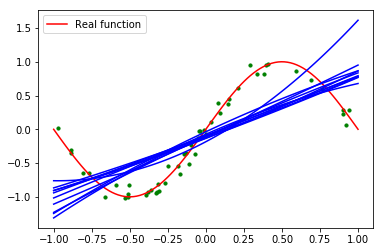

In [18]:
sigma = 0.1
N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon
plt.scatter(X[:,0], y, s=10, color='green')

interval = np.linspace(-1, 1, 100)
plt.plot(interval, np.sin(np.pi * interval), 'r', label = "Real function")

DEGREE = 2
NB_STATES = 10
poly = PolynomialFeatures(degree = DEGREE)
new_X = poly.fit_transform(X)

for i in range(NB_STATES):
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=i)
    lr_model = LinearRegression(fit_intercept = False)
    lr_model.fit(X_train, y_train)
    interval_transformed = poly.fit_transform(interval.reshape(-1, 1))
    plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'b')
    
plt.legend()

**Degree 3 - A good model**

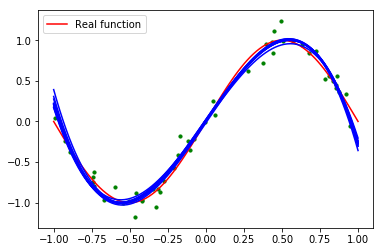

In [19]:
sigma = 0.1
N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon
plt.scatter(X[:,0], y, s=10, color='green')

interval = np.linspace(-1, 1, 100)
plt.plot(interval, np.sin(np.pi * interval), 'r', label = "Real function")

DEGREE = 3
NB_STATES = 10
poly = PolynomialFeatures(degree = DEGREE)
new_X = poly.fit_transform(X)

for i in range(NB_STATES):
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=i)
    lr_model = LinearRegression(fit_intercept = False)
    lr_model.fit(X_train, y_train)
    interval_transformed = poly.fit_transform(interval.reshape(-1, 1))
    plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'b')

plt.legend()

**Degree 15 - An overfiiting model**

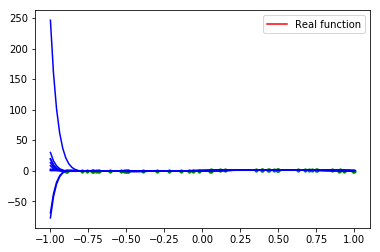

In [20]:
sigma = 0.1
N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon
plt.scatter(X[:,0], y, s=10, color='green')

interval = np.linspace(-1, 1, 100)
plt.plot(interval, np.sin(np.pi * interval), 'r', label = "Real function")

DEGREE = 15
NB_STATES = 10
poly = PolynomialFeatures(degree = DEGREE)
new_X = poly.fit_transform(X)

for i in range(NB_STATES):
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=i)
    lr_model = LinearRegression(fit_intercept = False)
    lr_model.fit(X_train, y_train)
    interval_transformed = poly.fit_transform(interval.reshape(-1, 1))
    plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'b')
    #plt.plot(interval[10:90], lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1)))[10:90], 'b')

plt.legend()

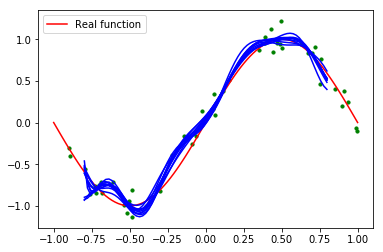

In [21]:
plt.scatter(X[:,0], y, s=10, color='green')
plt.plot(interval, np.sin(np.pi * interval), 'r', label = "Real function")

for i in range(NB_STATES):
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=i)
    lr_model = LinearRegression(fit_intercept = False)
    lr_model.fit(X_train, y_train)
    interval_transformed = poly.fit_transform(interval.reshape(-1, 1))
    #plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'b')
    plt.plot(interval[10:90], lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1)))[10:90], 'b')

plt.legend()

## 6.3 Improve Underfitting and Overfitting Models

To improve underfitting model, in general, we need to introduce new features that are aimed to explain the observed data.

To improve overfitting model, we can use larger data set and/or remove useless features. **Feature Selection** is a non-trivial problem in machine learning.

# 7. Feature Selection \[1\]: Backward Elimination

This is one of the simplest technique for feature selection.

**Backward Elimination Algorithm** (**Backward Stepwise Regression**)

1. Choose a significant level.
2. Train a linear regressor with all $D$ variables
3. Remove the variable with the biggest p-value.
4. Repeat:
 - Train a linear regressor with the remaining variables
 - Remove the variable with the biggest p-value.
 
 Until no p-value exceed the significant level.

In [23]:
sigma = 0.1
N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon

DEGREE = 10
NB_STATES = 10
poly = PolynomialFeatures(degree = DEGREE)
new_X = poly.fit_transform(X)
pd.DataFrame(new_X).head()


,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-0.494707,0.244735,-0.121072,0.059895,-0.029631,0.014658,-0.007252,0.003587,-0.001775,8.779756e-04
1,1.0,-0.238561,0.056911,-0.013577,0.003239,-0.000773,0.000184,-0.000044,0.000010,-0.000003,5.970303e-07
2,1.0,0.879186,0.772968,0.679582,0.597479,0.525295,0.461832,0.406036,0.356981,0.313853,2.759349e-01
3,1.0,0.788014,0.620967,0.489331,0.385599,0.303858,0.239444,0.188686,0.148687,0.117167,9.232960e-02
4,1.0,-0.378206,0.143040,-0.054099,0.020460,-0.007738,0.002927,-0.001107,0.000419,-0.000158,5.988058e-05


In [24]:

model = LinearRegression(fit_intercept = False)
model.fit(new_X, y)
model.coef_

array([-7.22321471e-02,  2.97197525e+00,  3.34878922e+00, -1.44362128e+00,
       -2.58916944e+01, -1.18840087e+01,  8.07642061e+01,  1.78681075e+01,
       -1.11267514e+02, -7.04181465e+00,  5.56862361e+01])

Backward elimination is implemented in library **statsmodels**. It use an OLS class to calculate p-value. It requires data already containing **dummy column**.

In [75]:
import statsmodels.formula.api as sm

SIGNIFICANT_LEVEL = 0.1
regressor_OLS = sm.OLS(y, new_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     262.4
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           1.56e-32
Time:                        19:03:07   Log-Likelihood:                 47.824
No. Observations:                  50   AIC:                            -73.65
Df Residuals:                      39   BIC:                            -52.62
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0715      0.048      1.493      0.144      -0.025       0.168
x1             3.4178      0.255     13.388      0.000       2.901       3.934
x2            -1.2098      1.340     -0.903      0.372      -3.920       1.500
x3            -6.4790      2.676     -2.421      0.020     -11.891      -1.067
x4             5.1841      9.579      0.541      0.591     -14.191      24.559
x5             5.1796      9.385      0.552      0.584     -13.804      24.163
x6            -8.8255     26.251     -0.336      0.739     -61.924      44.273
x7            -3.5159     12.900     -0.273      0.787     -29.608      22.577
x8             6.2599     30.446      0.206      0.838     -55.324      67.844
x9             1.4630      5.990      0.244      0.808     -10.652      13.578
x10           -1.5823     12.539     -0.126      0.900     -26.944      23.780
==============================================================================
Omnibus:                        4.164   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.682
Skew:                          -0.377   Prob(JB):                        0.262
Kurtosis:                       2.153   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The p values:**


In [77]:
regressor_OLS.pvalues

array([1.43597953e-01, 3.63246418e-16, 3.72016768e-01, 2.02116816e-02,
       5.91443472e-01, 5.84176412e-01, 7.38529060e-01, 7.86638105e-01,
       8.38170362e-01, 8.08315486e-01, 9.00230298e-01])

**Repeating**

In [86]:
sigma = 0.1
N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon

DEGREE = 10
NB_STATES = 10
poly = PolynomialFeatures(degree = DEGREE)
new_X = poly.fit_transform(X)

SIGNIFICANT_LEVEL = 0.1

selected = range(DEGREE + 1)
for p in range(DEGREE + 1):
    regressor_OLS = sm.OLS(y, new_X).fit()
    ind = np.argmax(regressor_OLS.pvalues)
    if regressor_OLS.pvalues[ind] < SIGNIFICANT_LEVEL:
         break
    new_X = np.delete(new_X, ind, 1)
    selected = np.delete(selected, ind)
selected

array([0, 1, 3, 5])

This means the method suggests using polynomial with monomial of degree $0, 1, 3, 5$.

# 8. Ridge and Lasso (Feature Selection \[2\])

## 8.1 Penalty method

Penalty methods are those which aim to avoid too large features by adding a **regularization term** (**penalty**) to the loss function. This penalty is high for large features.

## 8.2 Ridge

The Ridge Regression model is defined by the solution to the L2 optimization problem minimizing
$$
\sum_{n=1}^N \Vert \mathbf X_n \cdot \mathbf w - y_n \Vert^2 
$$
subject to 
$$
\Vert w\Vert_{2}^2 = w_1^2 + \ldots + w_D^2 \leq C
$$
for some $C>0$. 

This optimization problem is equivalent to the following one:
$$
\sum_{n=1}^N \Vert \mathbf X_n \cdot \mathbf w - y_n \Vert^2 + \lambda \Vert \mathbf w \Vert^2
$$
for some $\lambda > 0$.

Solution of this problem:
$$
(\mathbf \Phi^t \mathbf \Phi + \lambda \mathbf I_D)^{-1} \mathbf \Phi^t \mathbf y
$$

(using the same notation as in Linear Regression part)

Choice of $\lambda$ is usually derived from pratical trial.

**Implementation in Python**
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

[ 7.62488630e-03  3.05111317e+00 -2.08897571e-01 -6.79827095e+00
  2.14619400e+00  1.37278860e+01 -9.87330293e+00 -1.94217477e+01
  1.50621853e+01  9.50750437e+00 -6.99750351e+00]
[ 1.10364297e-03  2.63042460e+00 -7.60144274e-02 -2.42783509e+00
 -1.09472842e-01 -1.00443798e+00  1.36536327e-01  3.83933627e-02
  1.68544173e-01  7.30064438e-01  2.24839757e-02]


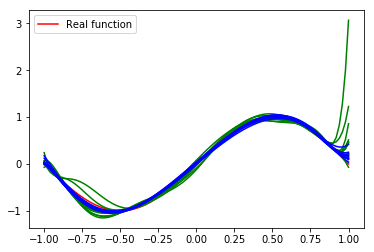

In [27]:
from sklearn.linear_model import LinearRegression, Ridge

sigma = 0.1
N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon

interval = np.linspace(-1, 1, 100)
plt.plot(interval, np.sin(np.pi * interval), 'r', label = "Real function")

#DEGREE = 2
DEGREE = 10
NB_STATES = 10
poly = PolynomialFeatures(degree = DEGREE)
new_X = poly.fit_transform(X)

    
for i in range(NB_STATES):
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=i)
    lr_model = LinearRegression(fit_intercept = False)
    lr_model.fit(X_train, y_train)
    interval_transformed = poly.fit_transform(interval.reshape(-1, 1))
    plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'g')

print lr_model.coef_
    
for i in range(NB_STATES):
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=i)
    lr_model = Ridge(fit_intercept = False, alpha = 0.01)
    lr_model.fit(X_train, y_train)
    interval_transformed = poly.fit_transform(interval.reshape(-1, 1))
    plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'b')

print lr_model.coef_

plt.legend()

## 8.3 Lasso

LASSO - Least Absolute Shrinkage and Selection Operator

The **lasso** regression model is defined by the solution to the L1 optimization problem
minimize
$$
\sum_{n=1}^N \Vert \mathbf X_n \cdot \mathbf w - y_n \Vert^2 
$$
subject to 
$$
\Vert w\Vert_{1} = |w_1| + \ldots + |w_D| \leq C
$$
for some $C>0$. This optimization problem is equivalent to the following one:
$$
\sum_{n=1}^N \Vert \mathbf X_n \cdot \mathbf w - y_n \Vert^2 + \lambda \Vert \mathbf w \Vert_1
$$

This is a convex optimization problem, hence the solution is unique, but generally cannot be expressed in closed form. Approximative methods are used for solving the optimization problem.

**Implementation in Python:** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

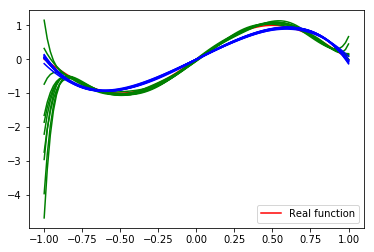

In [32]:
from sklearn.linear_model import LinearRegression, Lasso

sigma = 0.1
N = 50

X = np.random.uniform(-1, 1, [N, 1])
epsilon = np.random.normal(0, sigma, N)
y = np.sin(np.pi * X[:,0]) + epsilon

interval = np.linspace(-1, 1, 100)
plt.plot(interval, np.sin(np.pi * interval), 'r', label = "Real function")

#DEGREE = 2
DEGREE = 10
NB_STATES = 10
poly = PolynomialFeatures(degree = DEGREE)
new_X = poly.fit_transform(X)

    
for i in range(NB_STATES):
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=i)
    lr_model = LinearRegression(fit_intercept = False)
    lr_model.fit(X_train, y_train)
    interval_transformed = poly.fit_transform(interval.reshape(-1, 1))
    plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'g')
    
for i in range(NB_STATES):
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=TEST_SIZE, random_state=i)
    lr_model = Lasso(fit_intercept = False, alpha = 0.01)
    lr_model.fit(X_train, y_train)
    interval_transformed = poly.fit_transform(interval.reshape(-1, 1))
    plt.plot(interval, lr_model.predict(PolynomialFeatures(degree = DEGREE).fit_transform(interval.reshape(-1, 1))), 'b')


plt.legend()

Lasso favorizes sparse solution, hence, can be used for feature selection.

In [33]:
lr_model.coef_

array([ 0.        ,  2.32120225, -0.        , -1.94508776, -0.        ,
       -0.41402562, -0.        , -0.        , -0.        , -0.        ,
       -0.        ])

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson6/Amphi/Untitled2.png">

## References

[1] http://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf

[2] https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf

[3] C. M. Bishop, *Pattern Recognition And Machine Learning*, Springer 2006

[4] Andrew Ng, *Machine Learning*, Course on <a href="http://coursera.org">coursera.org</a>

[5] Kirill Eremenko, *Machine Learning A-Z$^{TM}$: Hands-On Python & R in Data Science*, course on <a href="http://udemy.com">udemy.com</a>